<a href="https://colab.research.google.com/github/girlwcode/2021DataYouthCampus/blob/master/Week3/11_RNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 실습 : Recurrent Neural Networks (RNNs)

## RNN layers

In [ ]:
import tensorflow as tf

- Tensorflow에서 제공하는 일반적인 RNN layers
  - 기본 RNN: tf.keras.layers.SimpleRNN
  - LSTM: tf.keras.layers.LSTM
  - GRU: tf.keras.layers.GRU

In [ ]:
# 기본적으로 RNN layer의 입력 tensor shape는 [batch, timesteps, feature]로 3D tensor
# 여기서 input은 16개의 time step을 가지고, 각 time step 마다 32차원의 값을 가지는 형태
sequence_len = 16
feature_dim = 32
input_sequence = tf.keras.Input(shape=(sequence_len, feature_dim))

# units은 RNN layer의 hidden state의 size를 의미함
units = 64
rnn = tf.keras.Sequential([  
  tf.keras.layers.SimpleRNN(units),
  tf.keras.layers.Dense(4, activation='softmax')
])

# input sequence를 입력해서 모델을 build
rnn(input_sequence)
# RNN layer의 출력 shape를 보면, 시간 축이 사라진 것을 확인 (output이 한개 뿐임)
# 마지막 time step의 output을 return
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                6208      
_________________________________________________________________
dense (Dense)                (None, 4)                 260       
Total params: 6,468
Trainable params: 6,468
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# RNN layer를 정의할 때, return_sequences=True로 설정해주면 시간축이 유지되도록 return
rnn = tf.keras.Sequential([  
  tf.keras.layers.SimpleRNN(units, return_sequences=True),
  tf.keras.layers.Dense(4, activation='softmax')
])

rnn(input_sequence)
# 시간 축에 따라, 모든 time step에 대한 output을 출력
# 마지막 dense layer도 모든 time step에 대해 동일하게 적용됨
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16, 64)            6208      
_________________________________________________________________
dense_1 (Dense)              (None, 16, 4)             260       
Total params: 6,468
Trainable params: 6,468
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# RNN layer를 여러 층 쌓을 때 return_sequences=True가 꼭 필요함
rnn = tf.keras.Sequential([  
  tf.keras.layers.SimpleRNN(units, return_sequences=True),
  tf.keras.layers.SimpleRNN(units, return_sequences=True),
  tf.keras.layers.SimpleRNN(units),
  tf.keras.layers.Dense(4, activation='softmax')
])

rnn(input_sequence)
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 16, 64)            6208      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16, 64)            8256      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 22,980
Trainable params: 22,980
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM을 사용하는 방법도 동일함 
lstm = tf.keras.Sequential([  
  tf.keras.layers.LSTM(units),
  tf.keras.layers.Dense(4, activation='softmax')
])

lstm(input_sequence)
# 기본 RNN layer보다 훨씬 많은 파라미터 수를 가지고 있음
lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 25,092
Trainable params: 25,092
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# return_state=True 로 설정하면, LSTM의 마지막 cell state와 hidden state를 모두 return 받을 수 있음
# tf.keras.Sequenctial에서는 각 layer의 output이 1개일때만 사용할수 있으므로, 적합하지 않음
# 그래서 직접 모델을 생성 (클래스 생성)
class LSTM(tf.keras.Model):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm_layer = tf.keras.layers.LSTM(units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(4, activation='softmax')

    def call(self, inputs):        
        whole_seq_output, final_hidden_state, final_cell_state = self.lstm_layer(inputs)
        
        # shape를 출력
        print("whole_seq_output :", whole_seq_output.shape)
        print("final_hidden_state :", final_hidden_state.shape)
        print("final_cell_state :", final_cell_state.shape)

        output_prob = self.dense(whole_seq_output)
        return output_prob

# 클래스 선언
lstm = LSTM()
lstm(input_sequence)

whole_seq_output : (None, 16, 64)
final_hidden_state : (None, 64)
final_cell_state : (None, 64)


<KerasTensor: shape=(None, 16, 4) dtype=float32 (created by layer 'lstm_1')>

In [ ]:
# GRU는 state가 하나로 되어있음
class GRU(tf.keras.Model):
    def __init__(self):
        super(GRU, self).__init__()
        self.gru_layer = tf.keras.layers.GRU(units, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(4, activation='softmax')

    def call(self, inputs):        
        whole_seq_output, final_state = self.gru_layer(inputs)

        # shape를 출력
        print("whole_seq_output :", whole_seq_output.shape)
        print("final_state :", final_state.shape)
        
        output_prob = self.dense(whole_seq_output)
        return output_prob

gru = GRU()
gru(input_sequence)

whole_seq_output : (None, 16, 64)
final_state : (None, 64)


<KerasTensor: shape=(None, 16, 4) dtype=float32 (created by layer 'gru')>

## Bidirectional RNNs

- Bidirectional RNN layer를 만들기 위해서, Wrapper 형태로 활용가능한 layer를 제공함
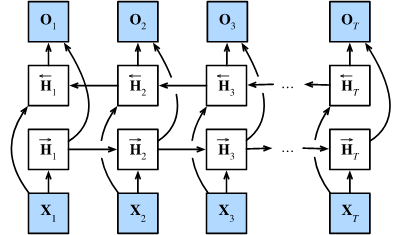
  - tf.keras.layers.Bidirectional
- Bidirectional로 활용하고자 하는 RNN layer를 감싸주는 형태로 구현

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model(input_sequence)
# 양방향의 hidden state를 모두 출력하므로, output 차원이 2배 (64 * 2)
# 오른쪽 64, 왼쪽 64개 되어 concat됨
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 516       
Total params: 50,180
Trainable params: 50,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# bidirectional RNN layer를 여러 층 쌓는 것도 가능
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model(input_sequence)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 16, 128)           49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 516       
Total params: 148,996
Trainable params: 148,996
Non-trainable params: 0
_________________________________________________________________


## TimeDistributed 이해 및 활용


- 시간 축에 대해 동일한 파라미터의 layer를 적용하는 방법
- RNN layer와 직접적으로 관련된 것은 아니지만, sequence 데이터를 다루다보면 꼭 필요한 기능
- 동일하게 적용할 layer를 wrapper로 감싸서 사용
  - tf.keras.layers.TimeDistributed
- Dense layer는 마지막 축(axis)에 대해 계산하므로, TimeDistributed가 자동으로 적용됨

In [ ]:
# RNN layer의 output을 dense layer에 통과 시키는 것은 시간 축에 따라 동일한 파라미터를 활용하는 것임
rnn = tf.keras.Sequential([  
  tf.keras.layers.SimpleRNN(units, return_sequences=True),
  tf.keras.layers.Dense(4, activation='softmax')
])

rnn(input_sequence)
rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 16, 64)            6208      
_________________________________________________________________
dense_9 (Dense)              (None, 16, 4)             260       
Total params: 6,468
Trainable params: 6,468
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# TimeDistributed를 활용하는 예시
# 위의 셀에서도 자동적으로 시간 축에 대해 동일한 파라미터를 사용하므로, 결과는 완전히 동일함
rnn = tf.keras.Sequential([  
  tf.keras.layers.SimpleRNN(units, return_sequences=True),
  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4, activation='softmax'))
])

rnn(input_sequence)
rnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 16, 64)            6208      
_________________________________________________________________
time_distributed (TimeDistri (None, 16, 4)             260       
Total params: 6,468
Trainable params: 6,468
Non-trainable params: 0
_________________________________________________________________


- 아래는 TimeDistributed가 꼭 필요한 상황의 예시
- 비디오 데이터 예시
  - sequence length는 10
  - 각 frame의 이미지는 128 x 128
  - 각 이미지의 채널 수는 3
- time step에 따라, 서로 다른 이미지에 동일한 CNN layer를 적용해야 하는 상황

In [ ]:
# input shape : [sequence length, width, height, channel]
inputs = tf.keras.Input(shape=(10, 128, 128, 3))

model = tf.keras.Sequential([
  tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3)))
])

model(inputs)
# 모든 time step에 대해 동일한 cnn layer 적용된 것 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 10, 126, 126, 64)  1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
